In [ ]:
"""
I used code provided in the following resources to create these functions and classes:

Hussain, T. (2025) ‘Seminar – LinearRegression’.
The California Housing Dataset (no date) The California housing dataset - Scikit-learn course. Available at: https://inria.github.io/scikit-learn-mooc/python_scripts/datasets_california_housing.html (Accessed: 21 February 2025).
Randomforestregressor (no date) scikit. Available at: https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html (Accessed: 21 February 2025).

I did not copy the code verbatim.
"""

Exploratory Data Analysis

In [ ]:
#Importing the important library
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from scipy.stats.mstats import winsorize
from sklearn.tree import plot_tree
from sklearn.linear_model import LinearRegression

In [ ]:
#Load the dataset
housing = fetch_california_housing()
X = housing.data
y = housing.target

print("The data shape is: ", X.shape, y.shape)
print("The features name are: ", housing.feature_names)
print("The target name is: ", housing.target_names)

The data shape is:  (20640, 8) (20640,)
The features name are:  ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
The target name is:  ['MedHouseVal']


In [ ]:
#Convert the data to dataframe
df = pd.DataFrame(X, columns=housing.feature_names)
df['MedHouseVal'] = y

#Basic data info
info = df.info()
print(info)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   MedInc       20640 non-null  float64
 1   HouseAge     20640 non-null  float64
 2   AveRooms     20640 non-null  float64
 3   AveBedrms    20640 non-null  float64
 4   Population   20640 non-null  float64
 5   AveOccup     20640 non-null  float64
 6   Latitude     20640 non-null  float64
 7   Longitude    20640 non-null  float64
 8   MedHouseVal  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None


In [ ]:
#Checking for missing values
missing_values = df.isnull().sum()
print(missing_values)

MedInc         0
HouseAge       0
AveRooms       0
AveBedrms      0
Population     0
AveOccup       0
Latitude       0
Longitude      0
MedHouseVal    0
dtype: int64


In [ ]:
#Print the first 5 row of the dataset
head = df.head()
print(head)

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  


In [ ]:
#Understand the dataset
describe = df.describe()
print(describe)

             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462122   
min        0.499900      1.000000      0.846154      0.333333      3.000000   
25%        2.563400     18.000000      4.440716      1.006079    787.000000   
50%        3.534800     29.000000      5.229129      1.048780   1166.000000   
75%        4.743250     37.000000      6.052381      1.099526   1725.000000   
max       15.000100     52.000000    141.909091     34.066667  35682.000000   

           AveOccup      Latitude     Longitude   MedHouseVal  
count  20640.000000  20640.000000  20640.000000  20640.000000  
mean       3.070655     35.631861   -119.569704      2.068558  
std       10.386050      2.135952      2.003532      1.153956  
min        0.692308     32.54000

In [ ]:
#Check for duplicates
duplicated = df.duplicated().sum()
print(duplicated)

0


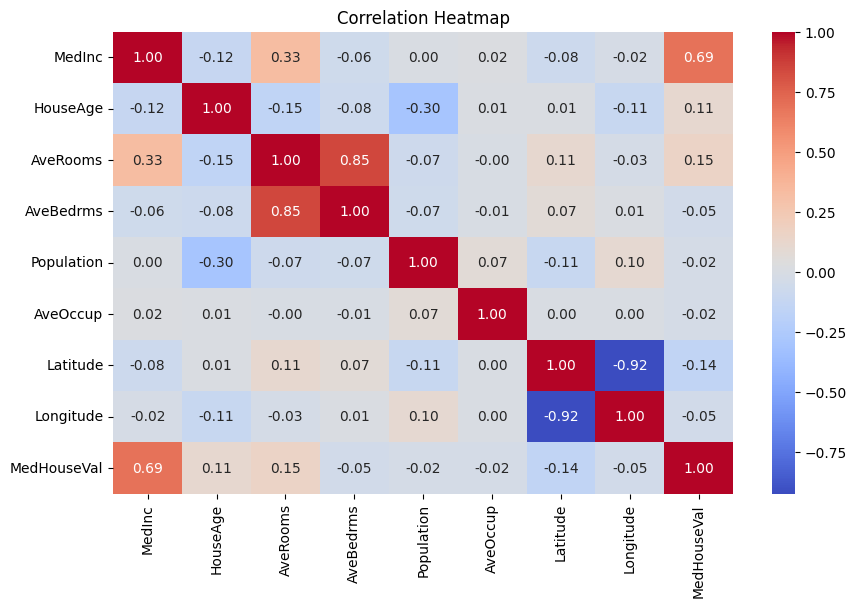

In [ ]:
#Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

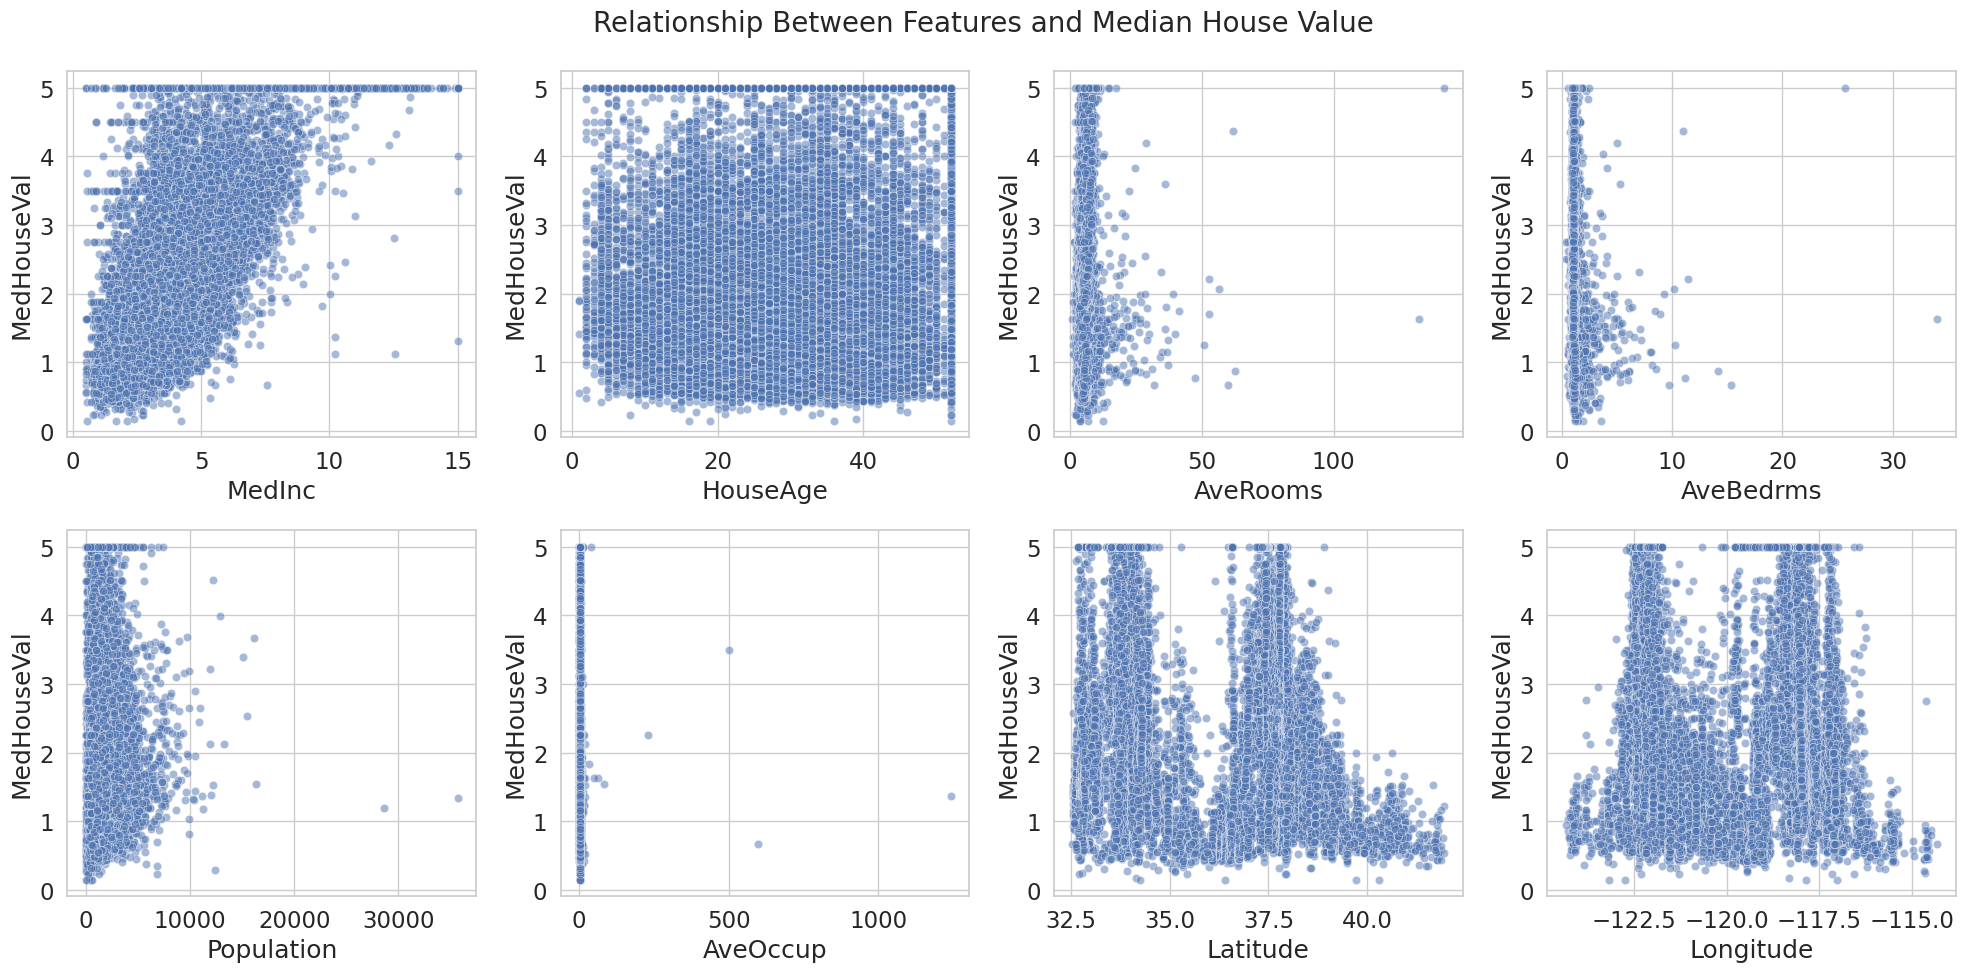

In [ ]:
sns.set(font_scale=1.5)
sns.set_style('whitegrid')

#Create a figure and a 2x4 grid of subplots
fig, axes = plt.subplots(2, 4, figsize=(20, 10))
axes = axes.flatten()

for i, feature in enumerate(housing.feature_names):
    sns.scatterplot(x=df.iloc[:, i], y=df["MedHouseVal"], alpha=0.5, legend=False, ax=axes[i])
    axes[i].set_xlabel(feature)
    axes[i].set_ylabel("MedHouseVal")

#Remove any empty subplots
if len(housing.feature_names) < 8:
    for i in range(len(housing.feature_names), 8):
        fig.delaxes(axes[i])

fig.suptitle("Relationship Between Features and Median House Value", fontsize=20)
plt.tight_layout()
plt.show()

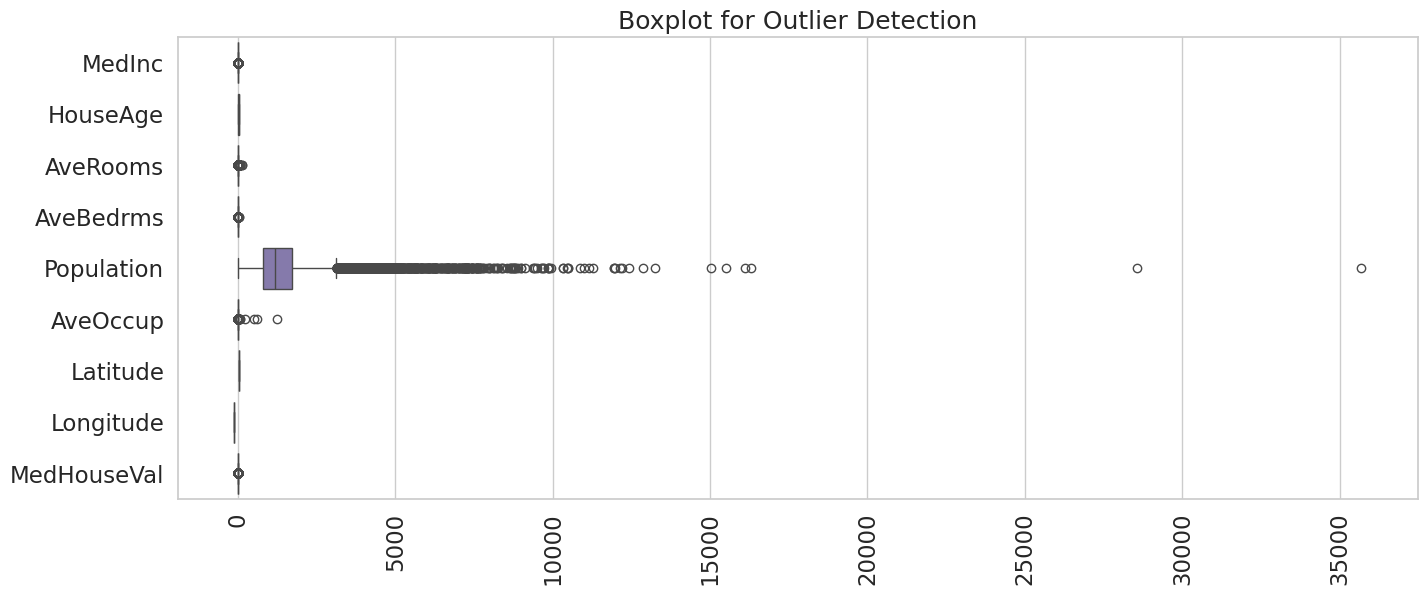

In [ ]:
#Visualizing Data
#Boxplot for Outlier Detection

plt.figure(figsize=(16, 6))
sns.boxplot(data=df, orient="h")
plt.xticks(rotation=90)
plt.title('Boxplot for Outlier Detection')
plt.show()

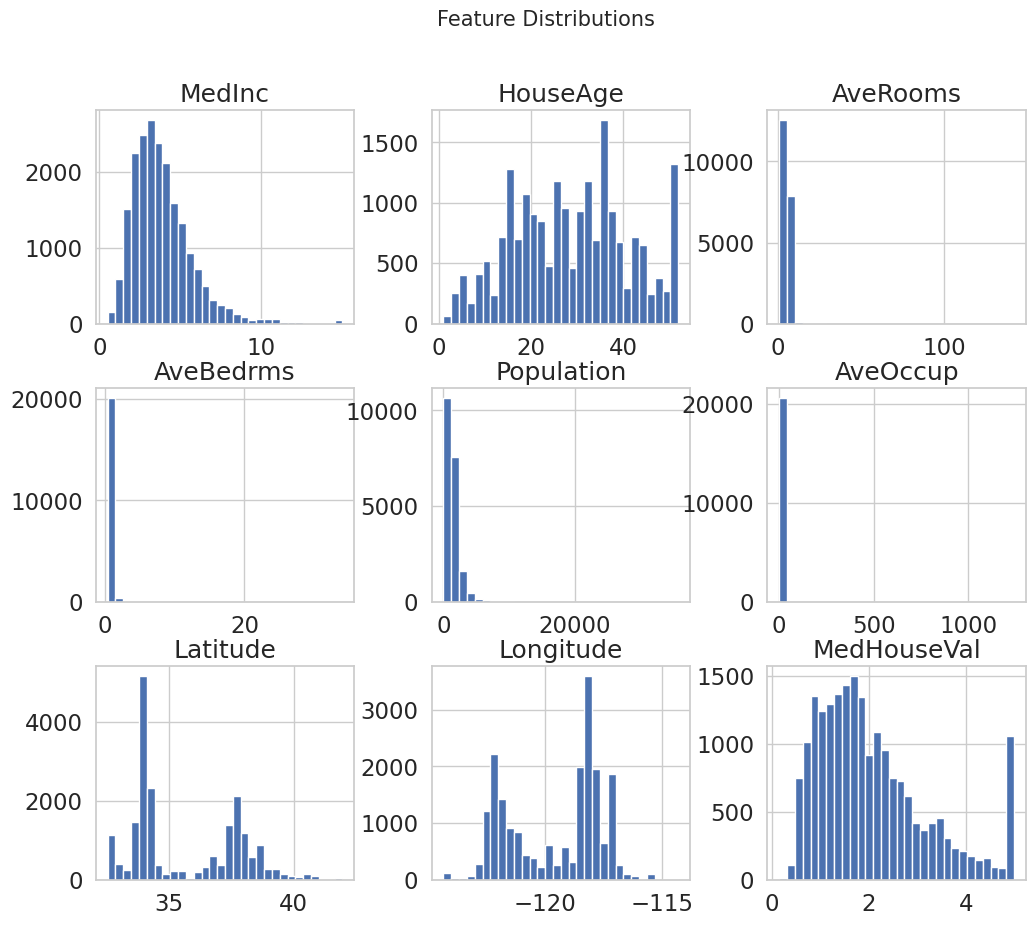

In [ ]:
#Histogram plot
df.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions", fontsize=15)
plt.show()

In [ ]:
#Normalization
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns)
df_scaled['MedHouseVal'] = df['MedHouseVal']

#Winsorization
df_scaled['AveRooms'] = winsorize(df_scaled['AveRooms'], limits=[0.01, 0.01])
df_scaled['Population'] = winsorize(df_scaled['Population'], limits=[0.01, 0.01])
df_scaled['AveOccup'] = winsorize(df_scaled['AveOccup'], limits=[0.01, 0.01])


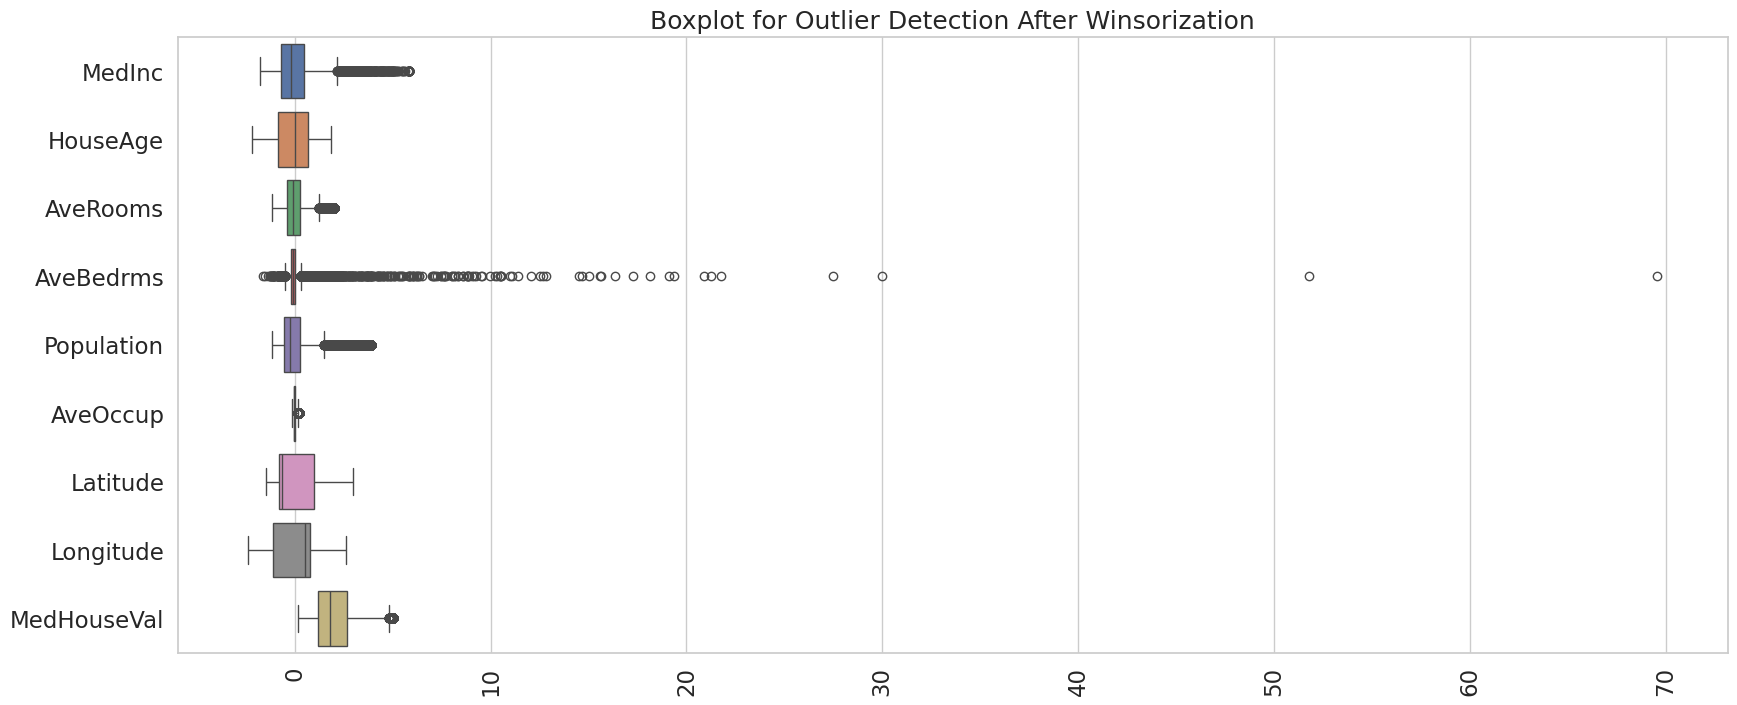

In [ ]:
#A boxplot to visualize the updated dataset
plt.figure(figsize=(20, 8))
sns.boxplot(data=df_scaled, orient="h")
plt.xticks(rotation=90)
plt.title("Boxplot for Outlier Detection After Winsorization")
plt.show()

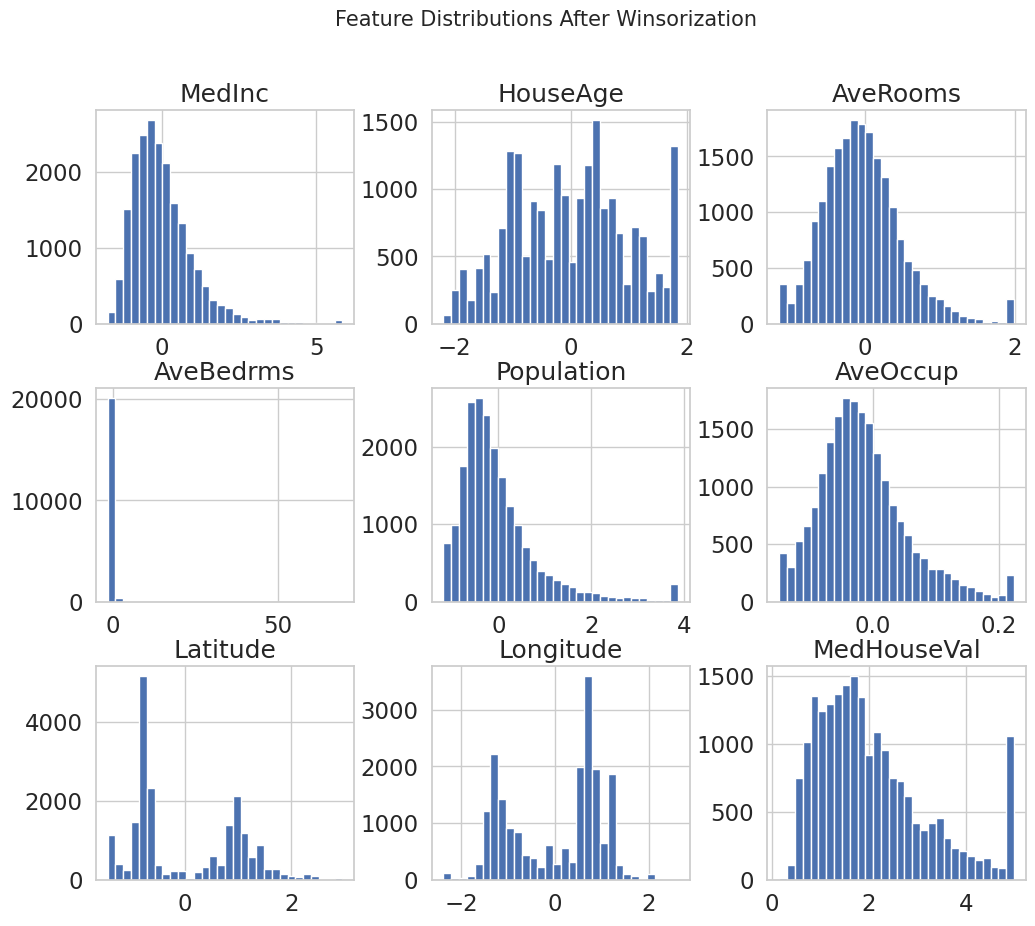

In [ ]:
#Histogram plot
df_scaled.hist(figsize=(12, 10), bins=30)
plt.suptitle("Feature Distributions After Winsorization", fontsize=15)
plt.show()

#Machine learning Model Development

In [ ]:
#Splitting the dataset into features and target
X = df_scaled.drop('MedHouseVal', axis=1)
y = df_scaled['MedHouseVal']

#Spliting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Random Forest Regression

In [ ]:
model_rf = RandomForestRegressor(random_state=42)

#Define the parameter distribution for RandomizedSearchCV
param_dist = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

#Perform RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=model_rf, param_distributions=param_dist,
                                  n_iter=10, cv=5, n_jobs=2, verbose=2, random_state=42)

#Fit the randomized search on the training data
random_search.fit(X_train, y_train)

#Get the best hyperparameters
best_params = random_search.best_params_

#Print the best parameters
print(f'Best Hyperparameters: {best_params}')

best_model = random_search.best_estimator_


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': None, 'bootstrap': True}


Linear Regression

In [ ]:
#Training the model
model_lr = LinearRegression()
model_lr.fit(X_train, y_train)

LinearRegression()

#Model Evaluation and Results Analysis

Random Forest Regression Visualization

In [ ]:
y_pred = best_model.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

#Print the results
print(f'Optimized Mean Squared Error: {mse}')
print(f'Optimized R-squared: {r2}')
print(f"Mean Absolute Error: {mae:.4f}")

Optimized Mean Squared Error: 0.26095492177803725
Optimized R-squared: 0.800859940590193
Mean Absolute Error: 0.3322


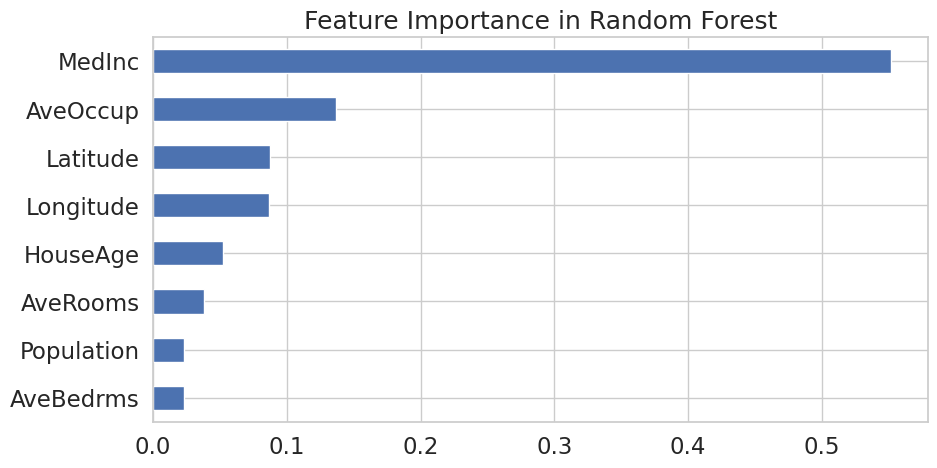

In [ ]:
#Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
plt.figure(figsize=(10, 5))
feature_importances.sort_values().plot(kind='barh')
plt.title("Feature Importance in Random Forest")
plt.show()

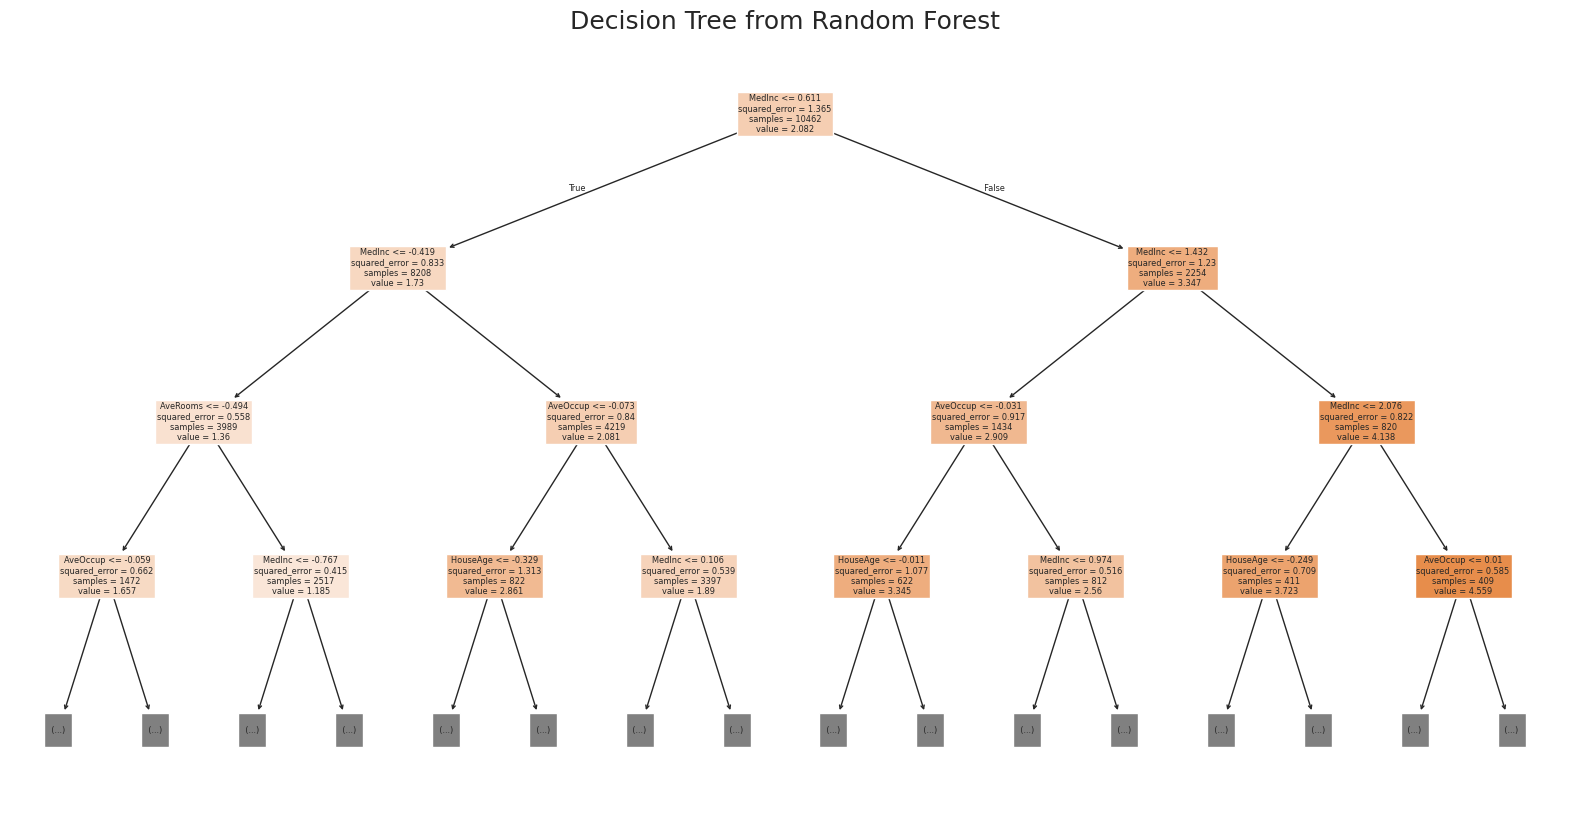

In [ ]:
#Plot a single decision tree from the forest
plt.figure(figsize=(20,10))
plot_tree(best_model.estimators_[0], feature_names=X_train.columns, filled=True, max_depth=3)  #Limit depth for readability
plt.title("Decision Tree from Random Forest")
plt.show()


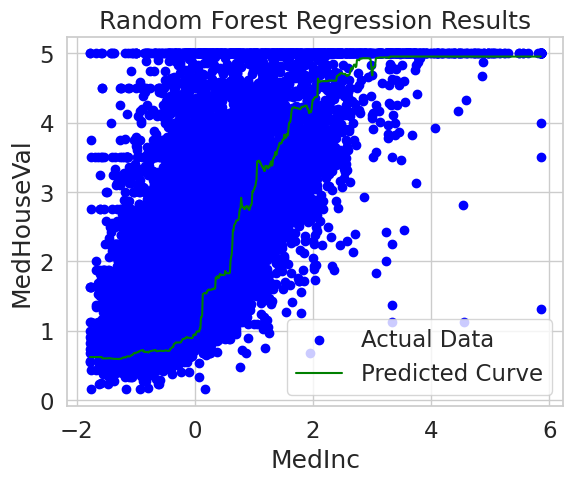

In [ ]:
feature_to_plot = 'MedInc'

X_grid = np.arange(X[feature_to_plot].min(), X[feature_to_plot].max(), 0.01)
X_grid_df = pd.DataFrame({feature_to_plot: X_grid})

#Fill other features with their mean values
for col in X.columns:
    if col != feature_to_plot:
        X_grid_df[col] = X[col].mean()

#Plot the results
plt.scatter(X[feature_to_plot], y, color='blue', label="Actual Data")
plt.plot(X_grid, best_model.predict(X_grid_df), color='green', label="Predicted Curve")
plt.title("Random Forest Regression Results")
plt.xlabel(feature_to_plot)
plt.ylabel("MedHouseVal")
plt.legend()
plt.show()


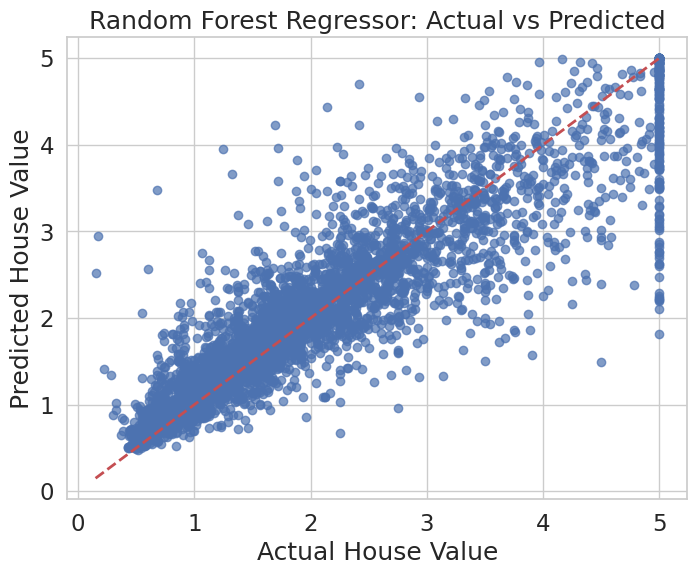

In [ ]:
# Plotting Actual vs Predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel("Actual House Value")
plt.ylabel("Predicted House Value")
plt.title("Random Forest Regressor: Actual vs Predicted")
plt.show()

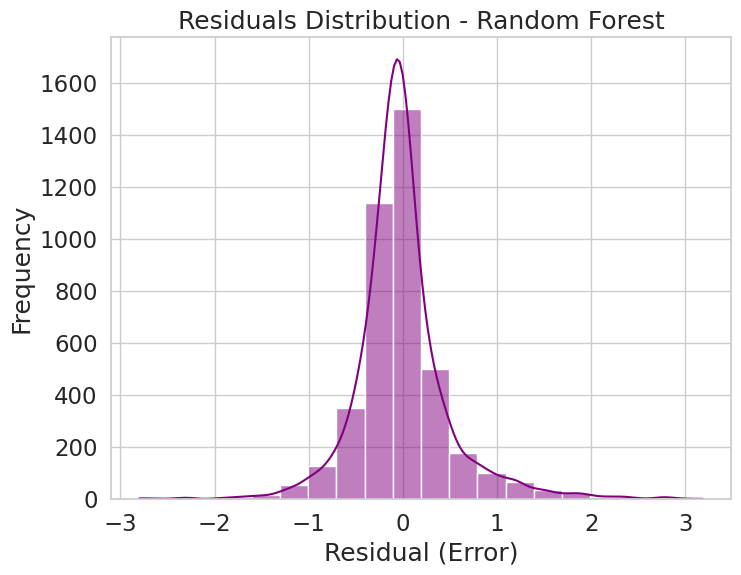

In [ ]:
#Residuals Plot
residuals = y_test - y_pred

plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution - Random Forest")
plt.show()

Linear Regression Visualization

In [ ]:
#Making a predection
y_prd = model_lr.predict(X_test)

#Calculate performance metrics
mse = mean_squared_error(y_test, y_prd)
mae = mean_absolute_error(y_test, y_prd)
r2 = r2_score(y_test, y_prd)

print(f'Mean Squared Error: {mse}')
print(f'Mean Absolute Error: {mae}')
print(f'R-squared: {r2}')

Mean Squared Error: 0.4790590010305178
Mean Absolute Error: 0.5054972173580772
R-squared: 0.6344202390359006


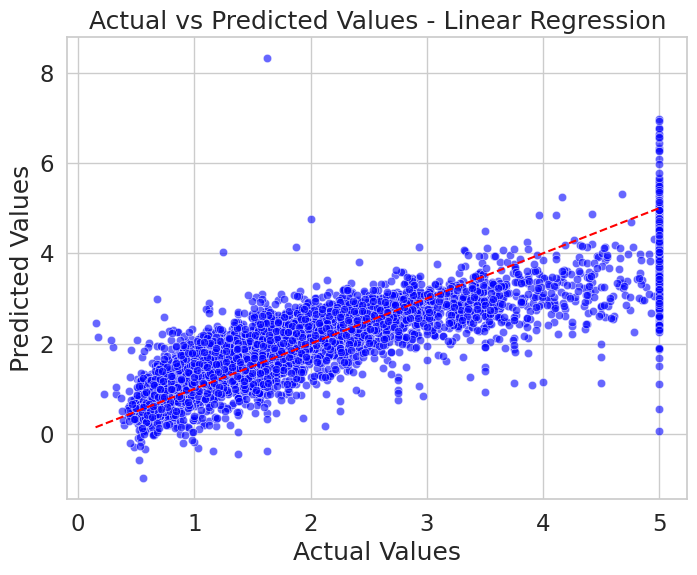

In [ ]:
#Visualizing the model_lr
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_prd, color="blue", alpha=0.6)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linestyle='--')
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted Values - Linear Regression")
plt.show()

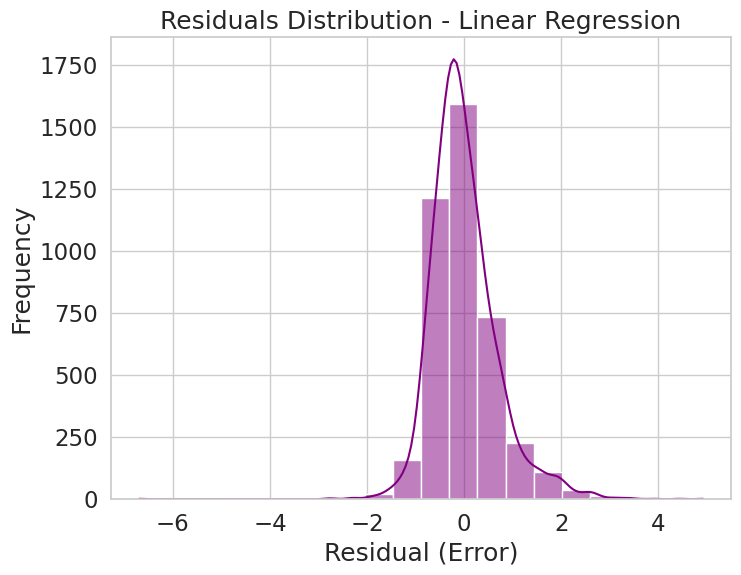

In [ ]:
residuals = y_test - y_prd
plt.figure(figsize=(8, 6))
sns.histplot(residuals, bins=20, kde=True, color="purple")
plt.xlabel("Residual (Error)")
plt.ylabel("Frequency")
plt.title("Residuals Distribution - Linear Regression")
plt.show()
